In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [2]:
df = pd.read_csv("/Users/appke/Desktop/Dataset/players_22.csv")
df.head()

/var/folders/m7/mgys6wfj2jz46rv0b3v4y_4m0000gn/T/ipykernel_7988/1947054326.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/appke/Desktop/Dataset/players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,Unnamed: 110
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,24/06/87,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,10/08/21,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,NaN
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,21/08/88,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,01/07/14,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,NaN
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,05/02/85,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,27/08/21,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flag

In [3]:
df.shape

(19239, 111)

In [4]:
duplicate = df[df.duplicated()]
duplicate.shape

(0, 111)

In [5]:
skills = []
for i in df.columns:
    skills.append(i)
    
skills

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [6]:
df.isnull().sum()

sofifa_id                          0
player_url                         0
short_name                         0
long_name                          0
player_positions                   0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
dob                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
club_name                         61
league_name                       61
league_level                      61
club_position                     61
club_jersey_number                61
club_loaned_from               18137
club_joined                     1163
club_contract_valid_until         61
nationality_id                     0
nationality_name                   0
nation_team_id                 18480
nation_position                18480
nation_jersey_number           18480
p

In [7]:
df = df.drop(['player_url','long_name','dob','club_team_id','club_name','league_name','league_level',
          'club_position','club_jersey_number','club_loaned_from',
          'club_joined','club_contract_valid_until','nationality_id',
          'nationality_name','nation_team_id','nation_position',
          'nation_jersey_number','preferred_foot','real_face','player_tags',
          'player_traits','player_face_url','club_logo_url','club_flag_url',
          'nation_logo_url','nation_flag_url'], axis=1)
df.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 110
0,158023,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,4,4,5,Medium/Low,Unique,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,NaN
1,188545,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,4,4,5,High/Medium,Unique,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,NaN
2,20801,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,4,5,5,High/Low,Unique,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,NaN
3,190871,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,5,5,5,High/Medium,Unique,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,NaN
4,192985,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,5,4,4,High/High,Unique,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,NaN


In [8]:
#Skill Columns

#Function to convert skill rating at each position.
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val

skill_columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
       'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
       'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

for col in skill_columns:
    df[col] = df[col].apply(skillConverter)
    df[col].fillna(0.0, inplace = True)

In [9]:
df.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 110
0,158023,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,4,4,5,Medium/Low,Unique,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,92,92,92,94,96,96,96,94,96,96,96,93,90,90,90,93,69,67,67,67,69,64,53,53,53,64,19+3,NaN
1,188545,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,4,4,5,High/Medium,Unique,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,92,92,92,90,96,96,96,90,89,89,89,87,83,83,83,87,67,69,69,69,67,64,63,63,63,64,19+3,NaN
2,20801,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,4,5,5,High/Low,Unique,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,91,91,91,96,98,98,98,96,89,89,89,89,81,81,81,89,66,62,62,62,66,63,56,56,56,63,20+3,NaN
3,190871,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,5,5,5,High/Medium,Unique,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,86,86,86,90,96,96,96,90,91,91,91,91,85,85,85,91,70,66,66,66,70,65,53,53,53,65,20+3,NaN
4,192985,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,5,4,4,High/High,Unique,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,86,86,86,96,94,94,94,96,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,21+3,NaN


In [10]:
result_st = []
for i in range(len(df['gk'])):
    result_st.append(df.eval(df['gk'][i]))

df['gk'] = result_st

In [11]:
df.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 110
0,158023,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,4,4,5,Medium/Low,Unique,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,92,92,92,94,96,96,96,94,96,96,96,93,90,90,90,93,69,67,67,67,69,64,53,53,53,64,22,NaN
1,188545,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,4,4,5,High/Medium,Unique,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,92,92,92,90,96,96,96,90,89,89,89,87,83,83,83,87,67,69,69,69,67,64,63,63,63,64,22,NaN
2,20801,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,4,5,5,High/Low,Unique,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,91,91,91,96,98,98,98,96,89,89,89,89,81,81,81,89,66,62,62,62,66,63,56,56,56,63,23,NaN
3,190871,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,5,5,5,High/Medium,Unique,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,86,86,86,90,96,96,96,90,91,91,91,91,85,85,85,91,70,66,66,66,70,65,53,53,53,65,23,NaN
4,192985,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,5,4,4,High/High,Unique,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,86,86,86,96,94,94,94,96,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24,NaN


In [12]:
df.isnull().sum()

sofifa_id                          0
short_name                         0
player_positions                   0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
height_cm                          0
weight_kg                          0
weak_foot                          0
skill_moves                        0
international_reputation           0
work_rate                          0
body_type                          0
release_clause_eur              1176
pace                            2132
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2132
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
s

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value_eur', ylabel='Density'>

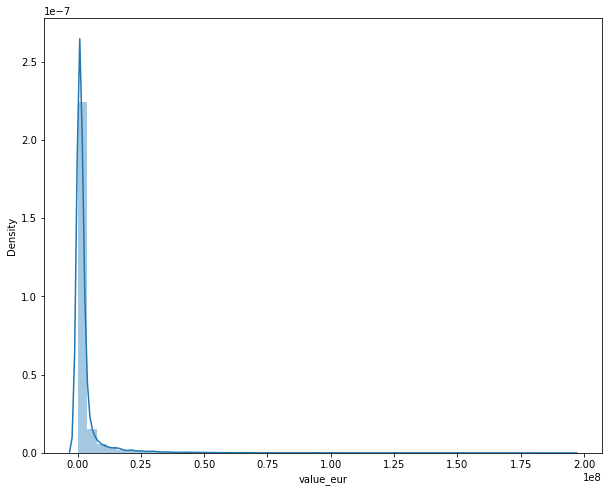

In [13]:
plt.subplots(figsize=(10,8))
sns.distplot(df.value_eur)

In [14]:
df["value_eur"].skew()

8.186343432357482

In [15]:
df['value_eur'] = df['value_eur'].fillna(df['value_eur'].median())

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wage_eur', ylabel='Density'>

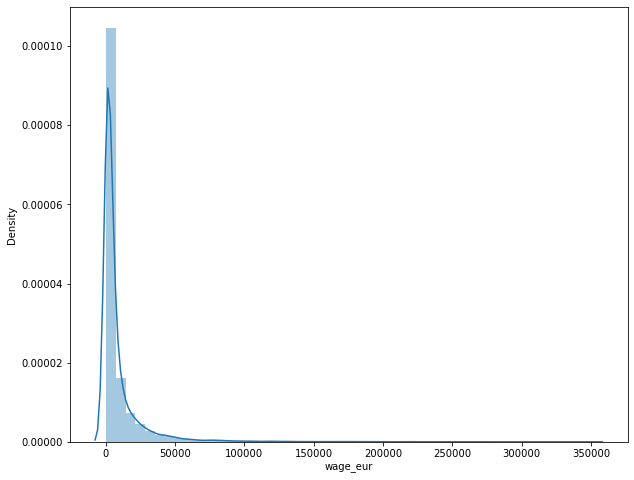

In [16]:
plt.subplots(figsize=(10,8))
sns.distplot(df.wage_eur)

In [17]:
df["wage_eur"].skew()

6.472150263300757

In [18]:
df['wage_eur'] = df['wage_eur'].fillna(df['wage_eur'].median())

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pace', ylabel='Density'>

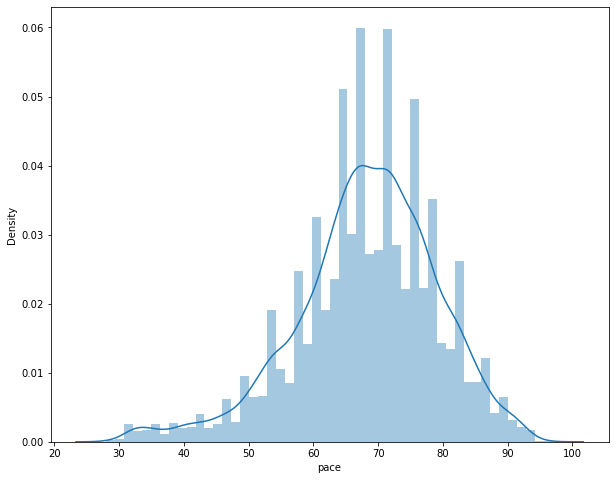

In [19]:
plt.subplots(figsize=(10,8))
sns.distplot(df.pace)

In [20]:
df["pace"].skew()

-0.5703408837405103

In [21]:
df["pace"].mean()

68.21307067282399

In [22]:
df["pace"].median()

69.0

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pace'>

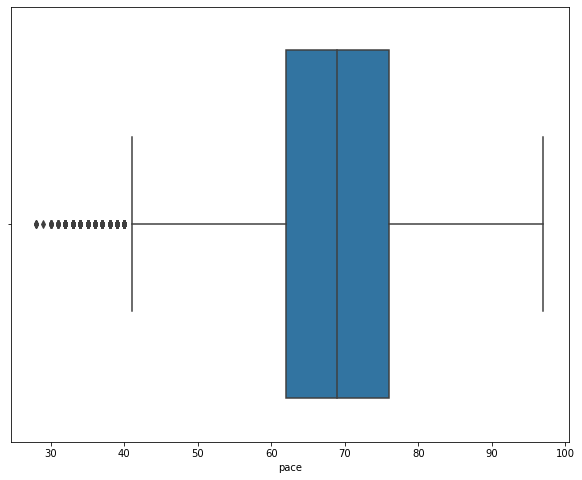

In [23]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.pace)

In [24]:
df['pace'] = df['pace'].fillna(df['pace'].median())

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shooting', ylabel='Density'>

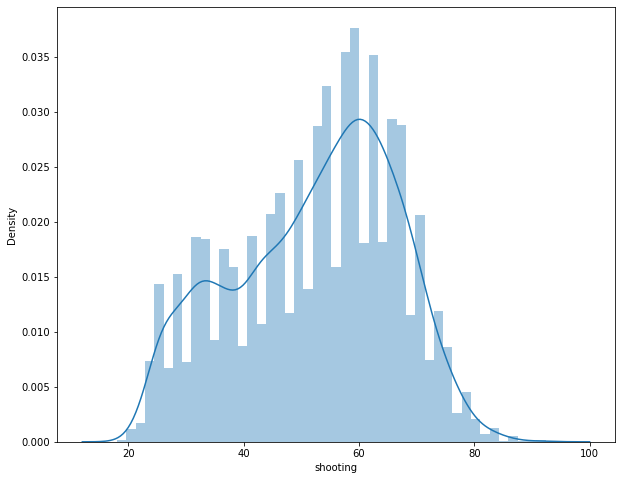

In [25]:
plt.subplots(figsize=(10,8))
sns.distplot(df.shooting)

In [26]:
df["shooting"].skew()

-0.27891311071528624

In [27]:
df["shooting"].mean()

52.3452972467411

In [28]:
df["shooting"].median()

54.0

In [29]:
df['shooting'] = df['shooting'].fillna(df['shooting'].median())

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='passing', ylabel='Density'>

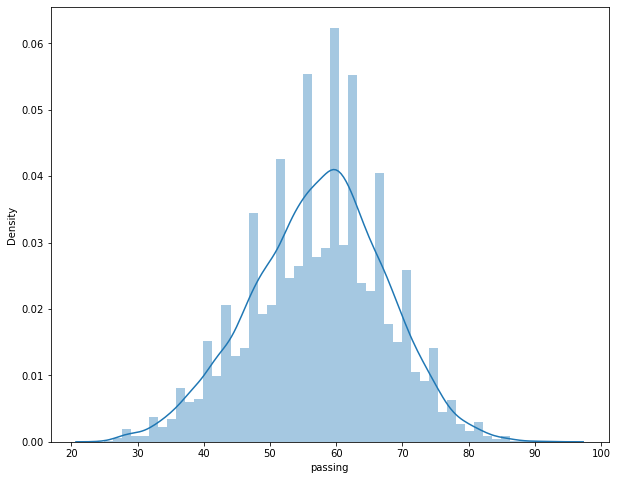

In [30]:
plt.subplots(figsize=(10,8))
sns.distplot(df.passing)

In [31]:
df["passing"].skew()

-0.1603308501355018

In [32]:
df["passing"].mean()

57.31256210907816

In [33]:
df["passing"].median()

58.0

In [34]:
df['passing'] = df['passing'].fillna(df['passing'].median())

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dribbling', ylabel='Density'>

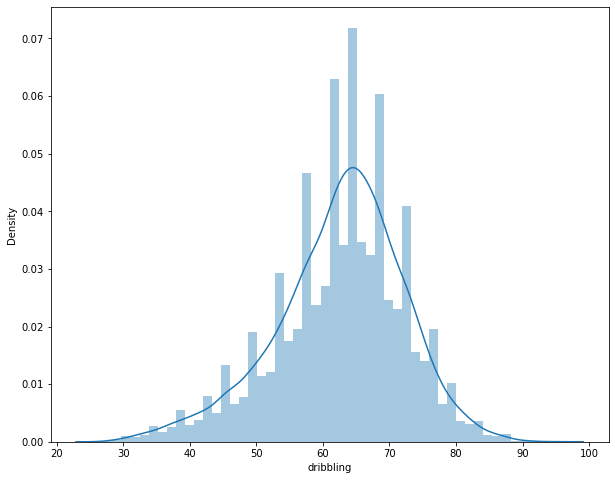

In [35]:
plt.subplots(figsize=(10,8))
sns.distplot(df.dribbling)

In [36]:
df["dribbling"].skew()

-0.4857236684056236

In [37]:
df["dribbling"].mean()

62.56117378850763

In [38]:
df["dribbling"].median()

64.0

In [39]:
df['dribbling'] = df['dribbling'].fillna(df['dribbling'].median())

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='defending', ylabel='Density'>

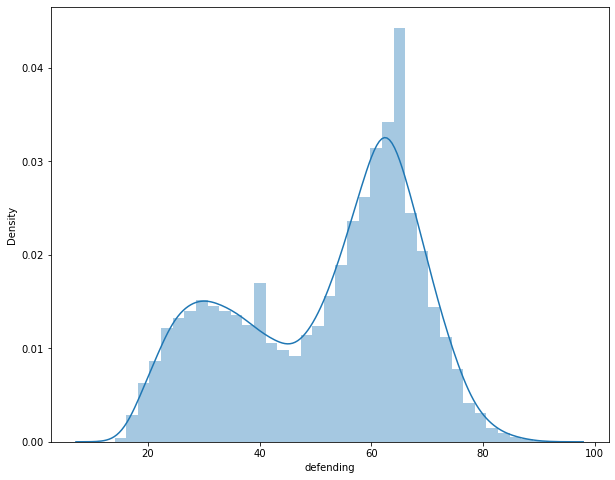

In [40]:
plt.subplots(figsize=(10,8))
sns.distplot(df.defending)

In [41]:
df["defending"].skew()

-0.405547803642739

In [42]:
df["defending"].mean()

51.70363009294441

In [43]:
df["defending"].median()

56.0

In [44]:
df['defending'] = df['defending'].fillna(df['defending'].median())

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='physic', ylabel='Density'>

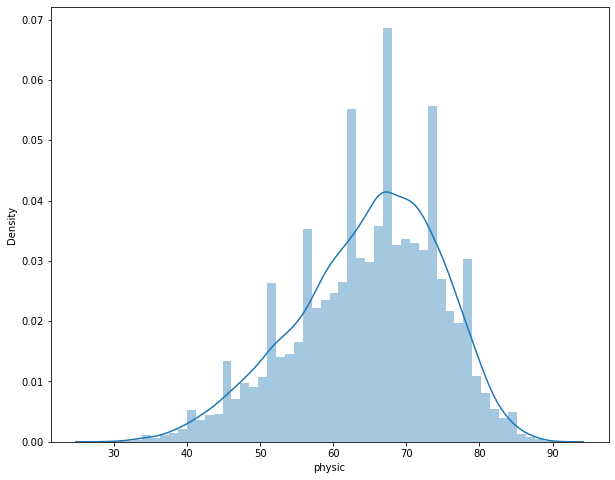

In [45]:
plt.subplots(figsize=(10,8))
sns.distplot(df.physic)

In [46]:
df["physic"].skew()

-0.45257957542999117

In [47]:
df["physic"].mean()

64.82328871222306

In [48]:
df["physic"].median()

66.0

In [49]:
df['physic'] = df['physic'].fillna(df['physic'].median())

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goalkeeping_speed', ylabel='Density'>

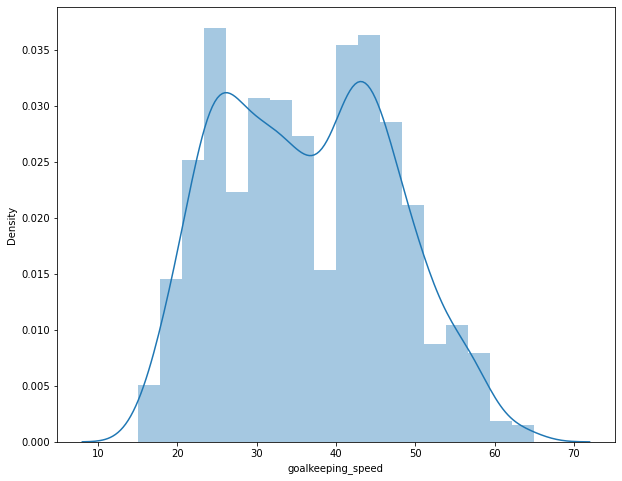

In [50]:
plt.subplots(figsize=(10,8))
sns.distplot(df.goalkeeping_speed)

In [51]:
df["goalkeeping_speed"].skew()

0.167081132952676

In [52]:
df["goalkeeping_speed"].mean()

36.43996247654784

In [53]:
df["goalkeeping_speed"].median()

36.0

In [54]:
df['goalkeeping_speed'] = df['goalkeeping_speed'].fillna(df['goalkeeping_speed'].median())

In [55]:
df.isnull().sum()

sofifa_id                          0
short_name                         0
player_positions                   0
overall                            0
potential                          0
value_eur                          0
wage_eur                           0
age                                0
height_cm                          0
weight_kg                          0
weak_foot                          0
skill_moves                        0
international_reputation           0
work_rate                          0
body_type                          0
release_clause_eur              1176
pace                               0
shooting                           0
passing                            0
dribbling                          0
defending                          0
physic                             0
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
s

# Outliers

# Potential

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='potential'>

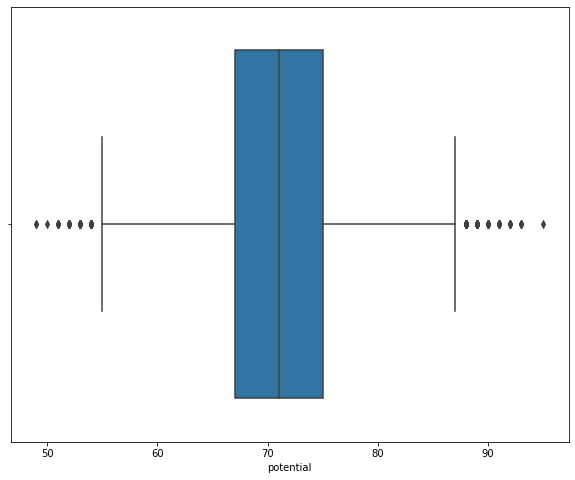

In [56]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.potential)

In [57]:
q3, q1 = np.percentile(df['potential'], [75 ,25])
iqr = float(q3 - q1)

In [58]:
def q3Iqr(col):
    return np.quantile(col, 0.75)

In [59]:
def q1Iqr(col):
    return np.quantile(col, 0.25)

In [60]:
def Iqr(q3,q1):
    return float(q3 - q1)

In [61]:
def upper(x):
   return q3Iqr(x)+1.5*iqr

In [62]:
def lower(x):
   return q1Iqr(x)-1.5*iqr

In [63]:
def replace_outlier(x):
    df[x] = np.where(
    df[x] > upper(df[x]),
    upper(df[x]),
    np.where(
        df[x] < lower(df[x]),
        lower(df[x]),
        df[x]
    )
)

In [64]:
replace_outlier('potential')

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='potential'>

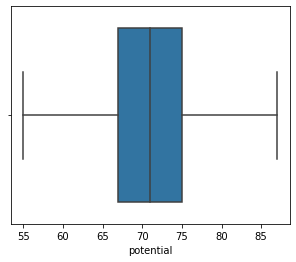

In [65]:
plt.subplots(figsize=(5,4))
sns.boxplot(df.potential)

In [66]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [67]:
outliers = find_outliers_IQR(df['potential'])

In [68]:
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = not_outliers.dropna().reset_index()
   return outliers_dropped

In [69]:
drop_outliers_IQR(df['potential']).count()

index        19239
potential    19239
dtype: int64

In [70]:
df.isnull().sum()

sofifa_id                          0
short_name                         0
player_positions                   0
overall                            0
potential                          0
value_eur                          0
wage_eur                           0
age                                0
height_cm                          0
weight_kg                          0
weak_foot                          0
skill_moves                        0
international_reputation           0
work_rate                          0
body_type                          0
release_clause_eur              1176
pace                               0
shooting                           0
passing                            0
dribbling                          0
defending                          0
physic                             0
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
s

In [71]:
def draw_box_plot(x):
    plt.subplots(figsize=(3,3))
    sns.boxplot(df[x])

In [72]:
def draw_dist_plot(x):
    plt.subplots(figsize=(3,3))
    sns.distplot(df[x])

In [73]:
df2 = df[['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
         'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
         'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
df2.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8
1,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10
2,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11
3,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11
4,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13


/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

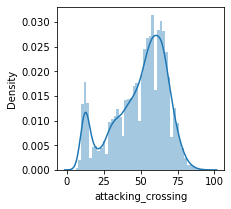

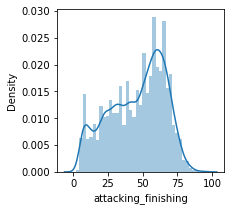

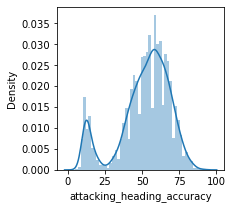

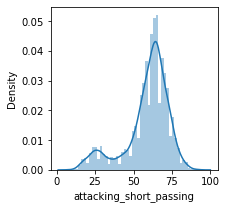

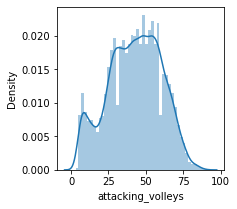

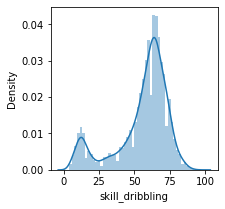

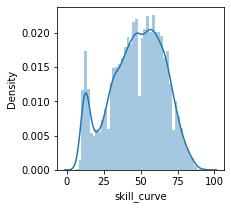

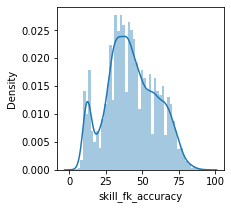

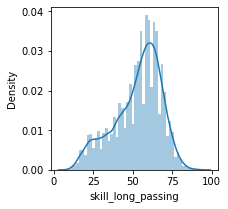

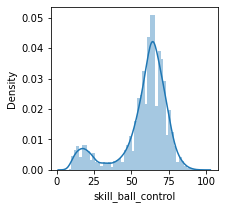

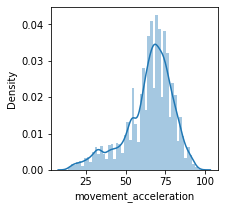

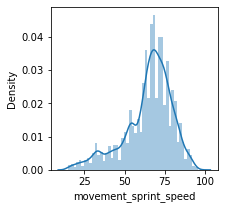

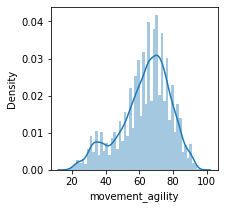

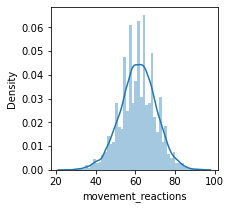

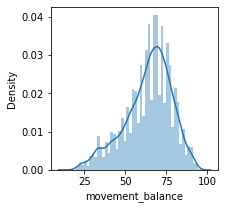

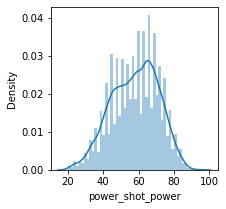

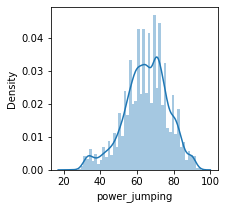

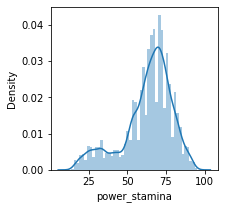

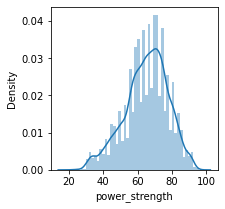

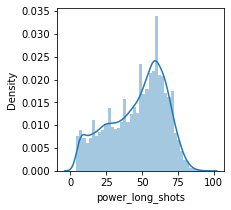

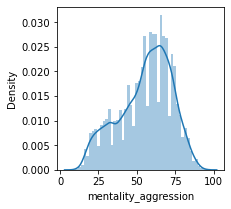

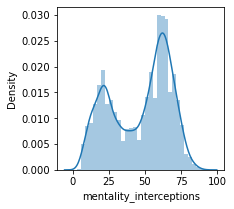

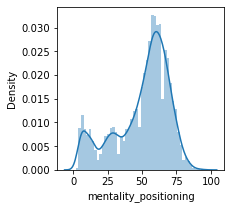

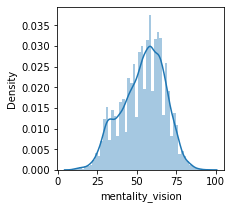

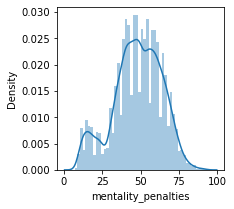

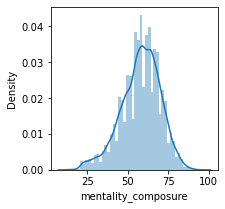

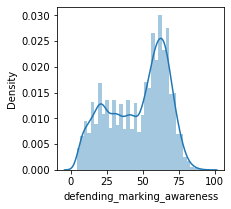

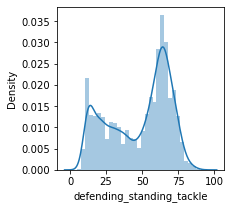

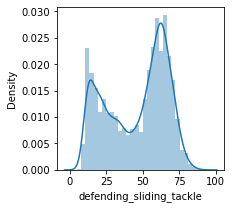

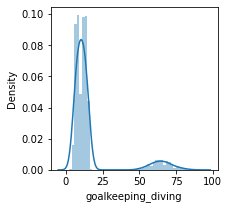

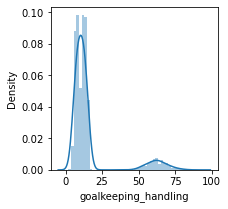

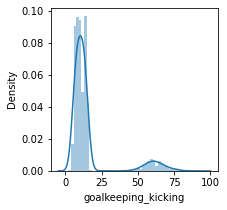

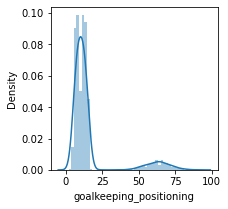

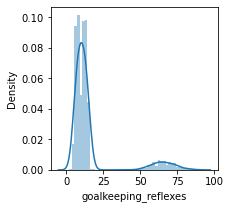

In [74]:
for i in df2:
    draw_dist_plot(i)

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

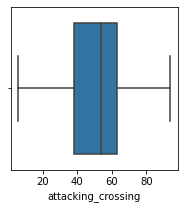

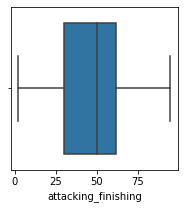

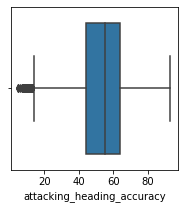

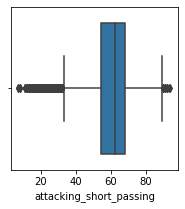

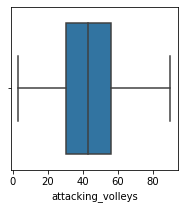

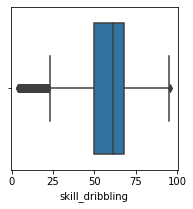

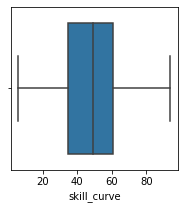

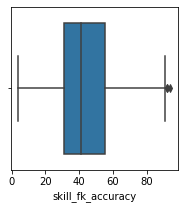

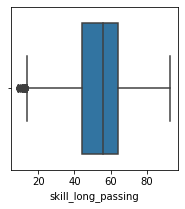

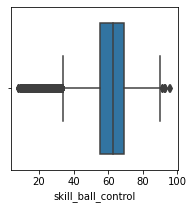

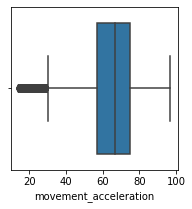

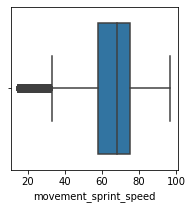

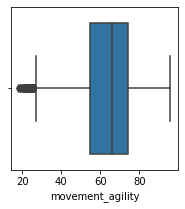

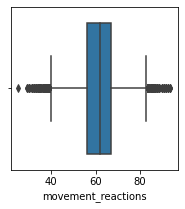

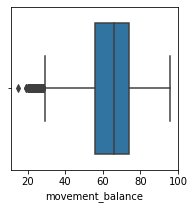

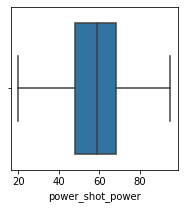

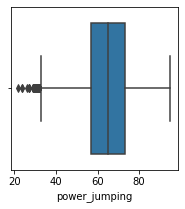

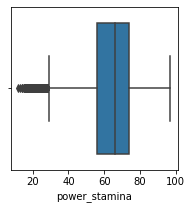

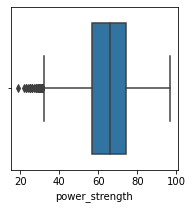

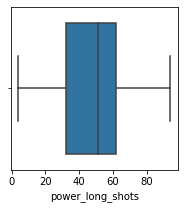

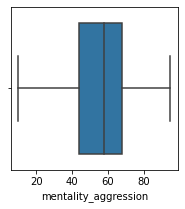

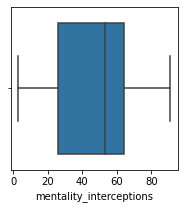

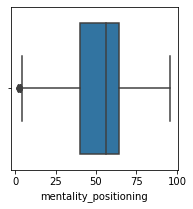

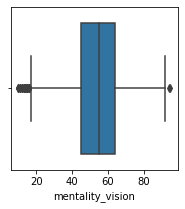

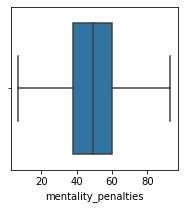

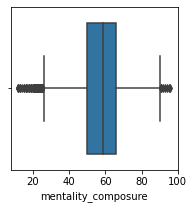

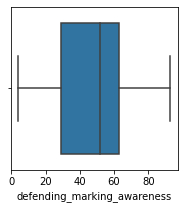

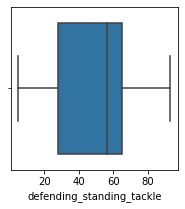

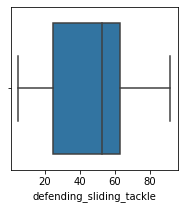

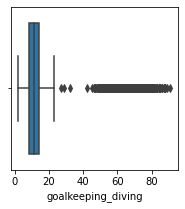

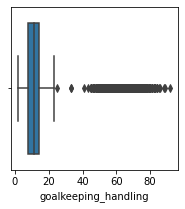

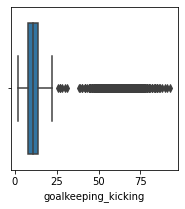

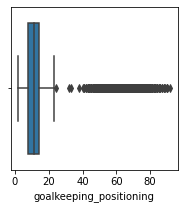

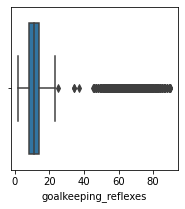

In [75]:
for i in df2:
    draw_box_plot(i)

In [76]:
for i in df2:
    replace_outlier(i)

In [77]:
df3 = df[['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
         'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
         'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
df3.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,75.0,74.0,70.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,87.0,80.0,86.0,79.0,86.0,80.0,68.0,72.0,69.0,74.0,44.0,40.0,76.0,76.0,72.0,78.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,71.0,74.0,76.0,80.0,68.0,80.0,73.0,67.0,70.0,81.0,77.0,79.0,77.0,79.0,82.0,80.0,85.0,76.0,86.0,74.0,80.0,49.0,76.0,76.0,72.0,78.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,75.0,74.0,76.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,85.0,87.0,86.0,79.0,74.0,80.0,85.0,77.0,77.0,74.0,63.0,29.0,76.0,76.0,72.0,78.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,75.0,74.0,63.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,87.0,87.0,86.0,79.0,84.0,80.0,64.0,81.0,53.0,74.0,63.0,37.0,76.0,76.0,72.0,78.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0
4,75.0,74.0,55.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,76.0,76.0,79.0,79.0,78.0,80.0,63.0,86.0,74.0,74.0,76.0,66.0,76.0,76.0,72.0,78.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0


/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

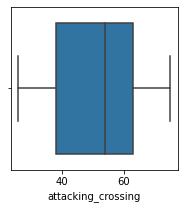

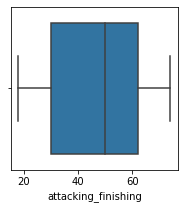

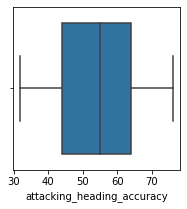

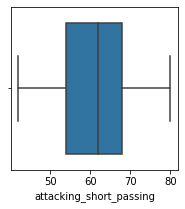

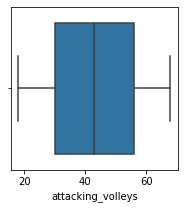

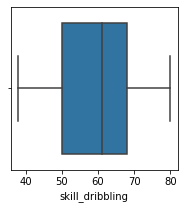

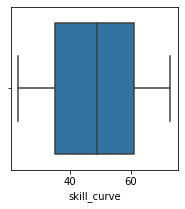

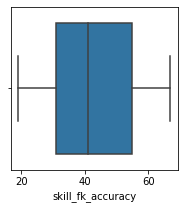

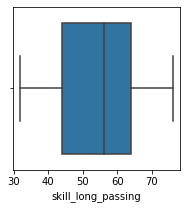

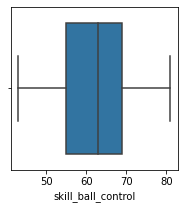

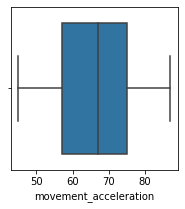

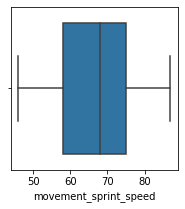

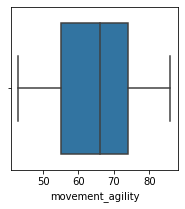

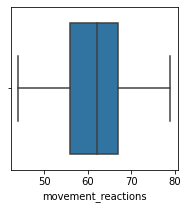

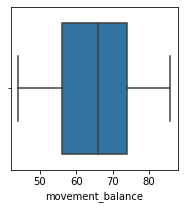

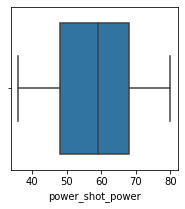

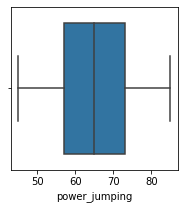

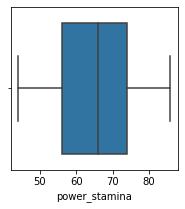

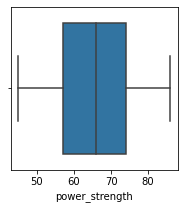

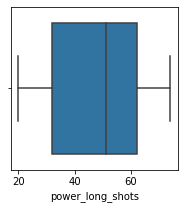

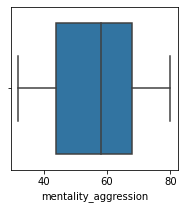

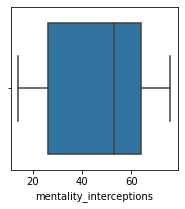

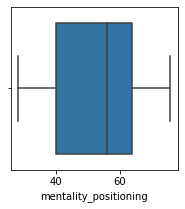

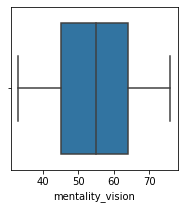

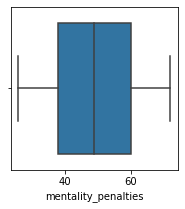

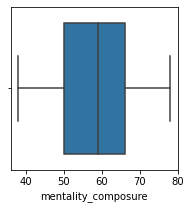

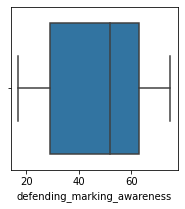

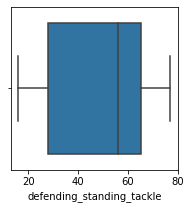

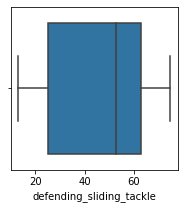

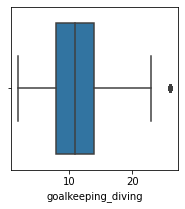

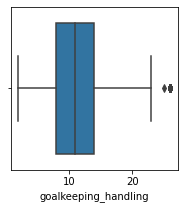

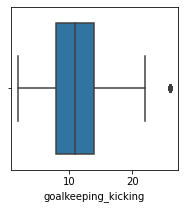

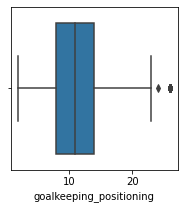

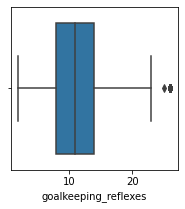

In [78]:
for i in df3:
    draw_box_plot(i)

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/appke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

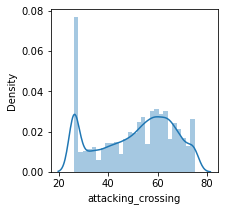

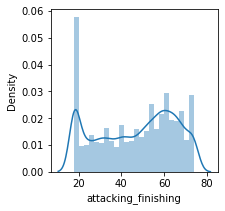

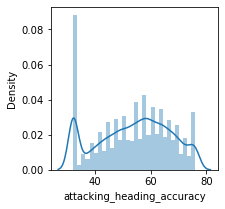

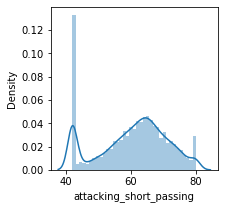

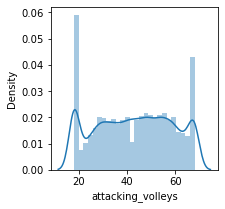

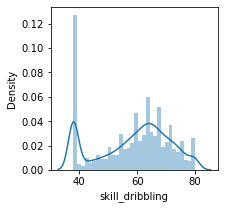

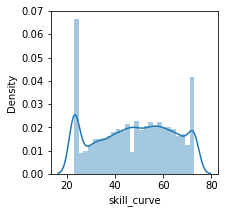

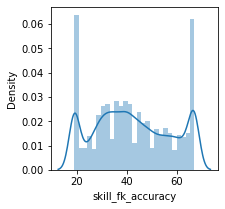

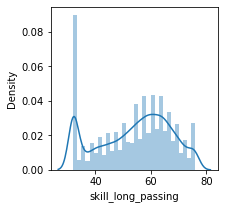

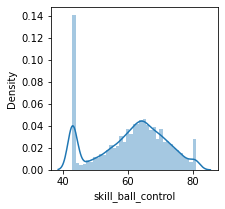

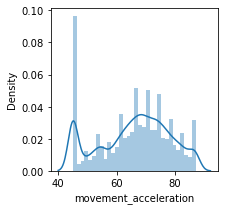

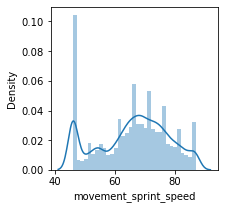

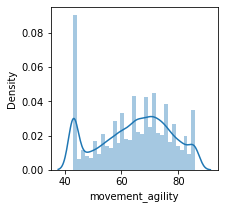

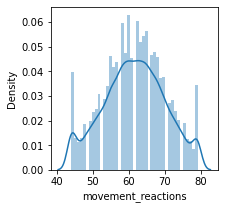

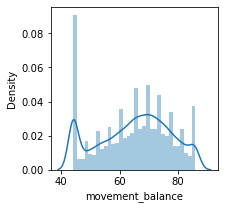

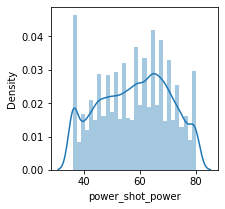

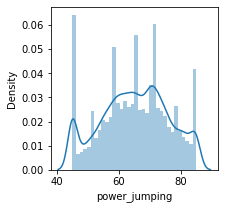

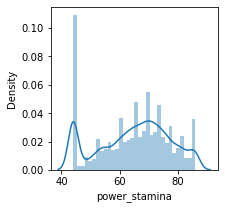

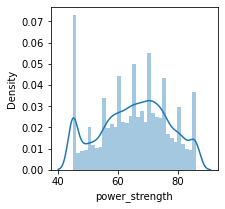

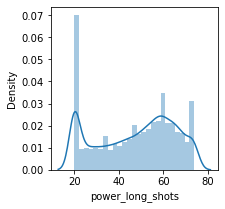

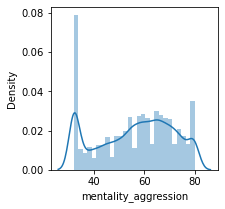

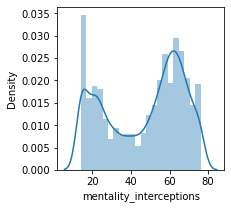

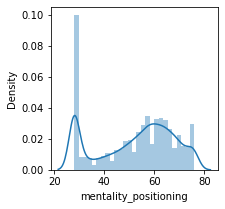

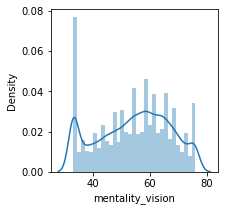

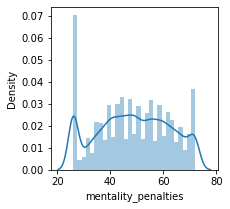

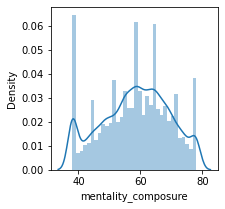

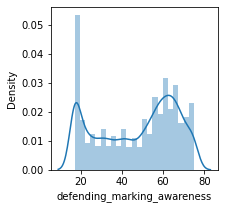

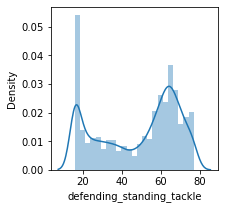

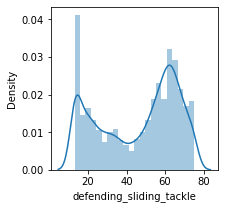

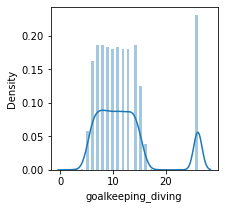

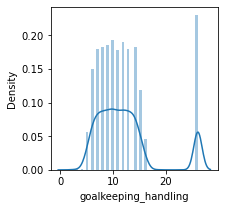

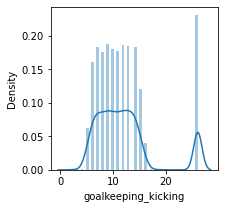

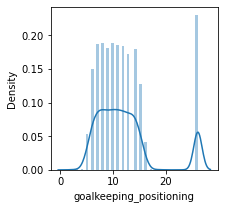

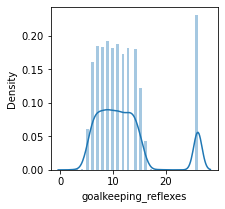

In [79]:
for i in df3:
    draw_dist_plot(i)

In [80]:
df["attacking_crossing"].median() 

54.0

In [81]:
df["attacking_crossing"].mean() 

50.864026196787776

In [82]:
df["attacking_crossing"].skew()

-0.307532029333003

# Anova test for finding Relation b/w player position and overall

In [83]:
from scipy.stats import f_oneway
CategoryGroupLists=df.groupby('player_positions')['overall'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  5.1049884279197476e-76


In [84]:
df = df.drop(['Unnamed: 110','release_clause_eur','player_positions'],axis=1)
df.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,93,87.0,78000000.0,320000.0,34,170,72,4,4,5,Medium/Low,Unique,85.0,92.0,91.0,95.0,34.0,65.0,75.0,74.0,70.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,87.0,80.0,86.0,79.0,86.0,80.0,68.0,72.0,69.0,74.0,44.0,40.0,76.0,76.0,72.0,78.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,36.0,92,92,92,94,96,96,96,94,96,96,96,93,90,90,90,93,69,67,67,67,69,64,53,53,53,64,22
1,188545,R. Lewandowski,92,87.0,119500000.0,270000.0,32,185,81,4,4,5,High/Medium,Unique,78.0,92.0,79.0,86.0,44.0,82.0,71.0,74.0,76.0,80.0,68.0,80.0,73.0,67.0,70.0,81.0,77.0,79.0,77.0,79.0,82.0,80.0,85.0,76.0,86.0,74.0,80.0,49.0,76.0,76.0,72.0,78.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,36.0,92,92,92,90,96,96,96,90,89,89,89,87,83,83,83,87,67,69,69,69,67,64,63,63,63,64,22
2,20801,Cristiano Ronaldo,91,87.0,45000000.0,270000.0,36,187,83,4,5,5,High/Low,Unique,87.0,94.0,80.0,88.0,34.0,75.0,75.0,74.0,76.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,85.0,87.0,86.0,79.0,74.0,80.0,85.0,77.0,77.0,74.0,63.0,29.0,76.0,76.0,72.0,78.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,36.0,91,91,91,96,98,98,98,96,89,89,89,89,81,81,81,89,66,62,62,62,66,63,56,56,56,63,23
3,190871,Neymar Jr,91,87.0,129000000.0,270000.0,29,175,68,5,5,5,High/Medium,Unique,91.0,83.0,86.0,94.0,37.0,63.0,75.0,74.0,63.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,87.0,87.0,86.0,79.0,84.0,80.0,64.0,81.0,53.0,74.0,63.0,37.0,76.0,76.0,72.0,78.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,36.0,86,86,86,90,96,96,96,90,91,91,91,91,85,85,85,91,70,66,66,66,70,65,53,53,53,65,23
4,192985,K. De Bruyne,91,87.0,125500000.0,350000.0,30,181,70,5,4,4,High/High,Unique,76.0,86.0,93.0,88.0,64.0,78.0,75.0,74.0,55.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,76.0,76.0,79.0,79.0,78.0,80.0,63.0,86.0,74.0,74.0,76.0,66.0,76.0,76.0,72.0,78.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,36.0,86,86,86,96,94,94,94,96,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24


In [85]:
y= df['overall']
x = df.drop(['overall','sofifa_id','short_name','work_rate','body_type'],axis=1)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=100, test_size=0.3)    

# Using Pearson Correlation

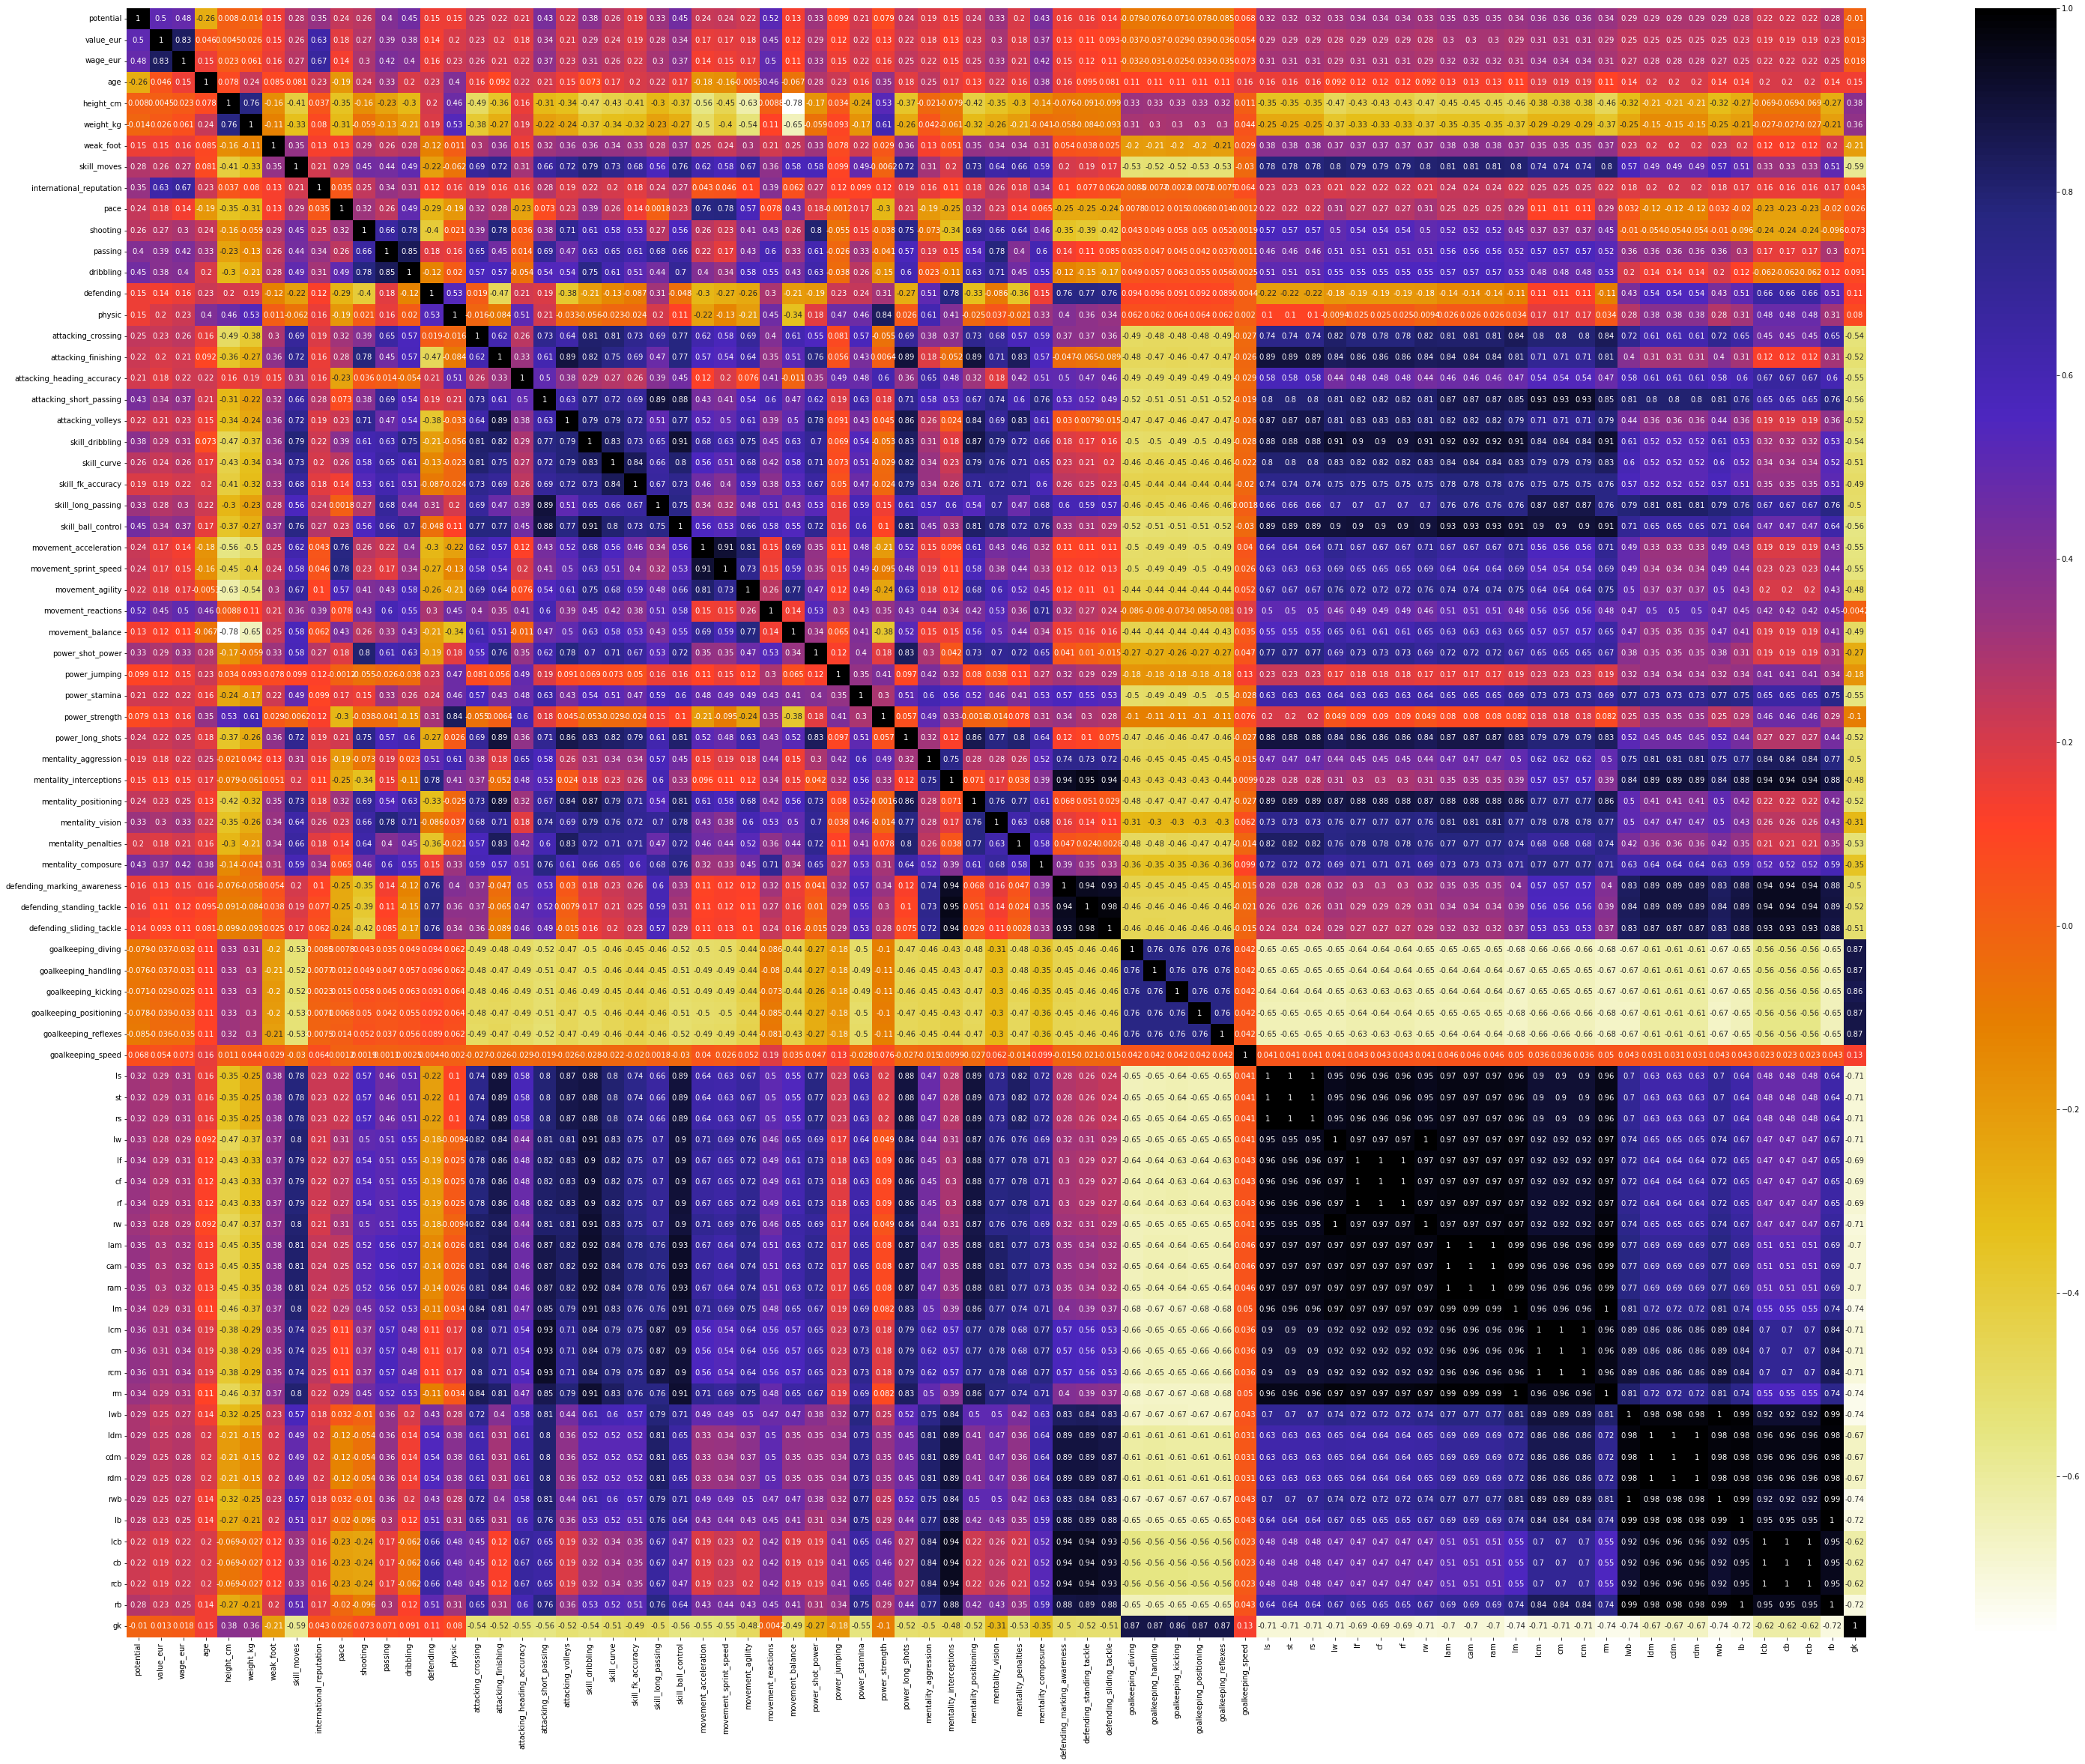

In [87]:
cor = X_train.corr()
plt.figure(figsize=(52,40))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [88]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [89]:
corr_features = correlation(X_train, 0.9)
corr_features

{'cam',
 'cb',
 'cdm',
 'cf',
 'cm',
 'defending_marking_awareness',
 'defending_sliding_tackle',
 'defending_standing_tackle',
 'lam',
 'lb',
 'lcb',
 'lcm',
 'ldm',
 'lf',
 'lm',
 'lw',
 'movement_sprint_speed',
 'ram',
 'rb',
 'rcb',
 'rcm',
 'rdm',
 'rf',
 'rm',
 'rs',
 'rw',
 'rwb',
 'skill_ball_control',
 'st'}

# Chi-square

In [90]:
from sklearn.feature_selection import chi2

In [91]:
f_p_values=chi2(X_train,y_train)
f_p_values

(array([3.04853931e+03, 2.38523788e+11, 4.45703913e+08, 2.97546709e+03,
        1.97261309e+01, 2.45726134e+02, 1.10373292e+02, 4.98826480e+02,
        9.15283485e+02, 6.43681933e+02, 9.36405943e+03, 9.24306302e+03,
        6.73818002e+03, 6.19213527e+03, 4.45371999e+03, 1.17119626e+04,
        1.09041385e+04, 7.29825441e+03, 9.37175753e+03, 1.08484128e+04,
        8.35768233e+03, 1.32571192e+04, 1.03883687e+04, 1.15599813e+04,
        9.15597486e+03, 1.02212929e+03, 1.16640863e+03, 2.60325577e+03,
        1.21738424e+04, 5.72349176e+02, 1.14687201e+04, 2.29587273e+03,
        6.23318604e+03, 4.20102408e+03, 1.53410744e+04, 9.56211347e+03,
        1.17453388e+04, 9.60391131e+03, 1.07957728e+04, 6.33657784e+03,
        1.46991516e+04, 1.01934166e+04, 8.22782946e+03, 7.08827335e+03,
        2.43082921e+02, 2.48039361e+02, 2.09308473e+02, 1.93582398e+02,
        2.27238603e+02, 1.77668708e+02, 1.08475679e+04, 1.08475679e+04,
        1.08475679e+04, 1.00243440e+04, 1.07794452e+04, 1.077944

In [92]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values
p_values.sort_index(ascending=False)

weight_kg                       1.859404e-29
weak_foot                       2.051081e-07
wage_eur                        0.000000e+00
value_eur                       0.000000e+00
st                              0.000000e+00
skill_moves                     7.531119e-78
skill_long_passing              0.000000e+00
skill_fk_accuracy               0.000000e+00
skill_dribbling                 0.000000e+00
skill_curve                     0.000000e+00
skill_ball_control              0.000000e+00
shooting                        0.000000e+00
rwb                             0.000000e+00
rw                              0.000000e+00
rs                              0.000000e+00
rm                              0.000000e+00
rf                              0.000000e+00
rdm                             0.000000e+00
rcm                             0.000000e+00
rcb                             0.000000e+00
rb                              0.000000e+00
ram                             0.000000e+00
power_stre

# Mutual information gain

In [93]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.8377359 , 1.29233488, 0.62431948, 0.18285561, 0.01287211,
       0.01817382, 0.02404683, 0.11273928, 0.14057306, 0.0483041 ,
       0.25894287, 0.37152692, 0.40503008, 0.3980827 , 0.17063463,
       0.25874582, 0.16255027, 0.16766257, 0.42963881, 0.14872675,
       0.32022076, 0.19775263, 0.11202449, 0.245644  , 0.4906628 ,
       0.04442517, 0.04179577, 0.05505221, 0.77411948, 0.01298612,
       0.26813399, 0.04879305, 0.14239753, 0.0789078 , 0.23152552,
       0.16003492, 0.35078606, 0.29303981, 0.25681027, 0.10372563,
       0.46447975, 0.29106213, 0.31383916, 0.27749731, 0.01175219,
       0.01887257, 0.01764324, 0.00862037, 0.01564106, 0.02049654,
       0.55959785, 0.56811327, 0.56332391, 0.46467716, 0.47215087,
       0.4645763 , 0.48033043, 0.45814006, 0.60274693, 0.59676246,
       0.61174938, 0.65545142, 0.60039806, 0.6147479 , 0.61089223,
       0.65593653, 0.57009317, 0.56038344, 0.5523524 , 0.56830312,
       0.56188135, 0.64579738, 0.54357675, 0.5479151 , 0.54121

In [94]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

value_eur                      1.292335
potential                      0.837736
movement_reactions             0.774119
rm                             0.655937
lm                             0.655451
rb                             0.652293
lb                             0.645797
wage_eur                       0.624319
cm                             0.614748
ram                            0.611749
rcm                            0.610892
lam                            0.602747
lcm                            0.600398
cam                            0.596762
lwb                            0.570093
rdm                            0.568303
st                             0.568113
rs                             0.563324
rwb                            0.561881
ldm                            0.560383
ls                             0.559598
cdm                            0.552352
cb                             0.547915
lcb                            0.543577
rcb                            0.541219


In [95]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [96]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=35)

In [97]:
# apply feature selection
X_selected = fs.fit_transform(x, y)
print(X_selected.shape)

(19239, 35)


In [98]:
X_selected

array([[8.700e+01, 7.800e+07, 3.200e+05, ..., 6.700e+01, 6.700e+01,
        6.900e+01],
       [8.700e+01, 1.195e+08, 2.700e+05, ..., 6.900e+01, 6.900e+01,
        6.700e+01],
       [8.700e+01, 4.500e+07, 2.700e+05, ..., 6.200e+01, 6.200e+01,
        6.600e+01],
       ...,
       [5.500e+01, 1.000e+05, 5.000e+02, ..., 4.800e+01, 4.800e+01,
        4.900e+01],
       [6.000e+01, 1.100e+05, 5.000e+02, ..., 3.100e+01, 3.100e+01,
        3.500e+01],
       [6.000e+01, 1.100e+05, 5.000e+02, ..., 4.600e+01, 4.600e+01,
        4.700e+01]])

In [99]:
filter = fs.get_support()
vector_names = list(x.columns[fs.get_support(indices=True)])
print(vector_names)

['potential', 'value_eur', 'wage_eur', 'age', 'international_reputation', 'passing', 'dribbling', 'physic', 'attacking_short_passing', 'skill_dribbling', 'skill_long_passing', 'skill_ball_control', 'movement_reactions', 'power_shot_power', 'mentality_vision', 'mentality_composure', 'ls', 'st', 'rs', 'lf', 'cf', 'rf', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb']


In [100]:
df.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,93,87.0,78000000.0,320000.0,34,170,72,4,4,5,Medium/Low,Unique,85.0,92.0,91.0,95.0,34.0,65.0,75.0,74.0,70.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,87.0,80.0,86.0,79.0,86.0,80.0,68.0,72.0,69.0,74.0,44.0,40.0,76.0,76.0,72.0,78.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,36.0,92,92,92,94,96,96,96,94,96,96,96,93,90,90,90,93,69,67,67,67,69,64,53,53,53,64,22
1,188545,R. Lewandowski,92,87.0,119500000.0,270000.0,32,185,81,4,4,5,High/Medium,Unique,78.0,92.0,79.0,86.0,44.0,82.0,71.0,74.0,76.0,80.0,68.0,80.0,73.0,67.0,70.0,81.0,77.0,79.0,77.0,79.0,82.0,80.0,85.0,76.0,86.0,74.0,80.0,49.0,76.0,76.0,72.0,78.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,36.0,92,92,92,90,96,96,96,90,89,89,89,87,83,83,83,87,67,69,69,69,67,64,63,63,63,64,22
2,20801,Cristiano Ronaldo,91,87.0,45000000.0,270000.0,36,187,83,4,5,5,High/Low,Unique,87.0,94.0,80.0,88.0,34.0,75.0,75.0,74.0,76.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,85.0,87.0,86.0,79.0,74.0,80.0,85.0,77.0,77.0,74.0,63.0,29.0,76.0,76.0,72.0,78.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,36.0,91,91,91,96,98,98,98,96,89,89,89,89,81,81,81,89,66,62,62,62,66,63,56,56,56,63,23
3,190871,Neymar Jr,91,87.0,129000000.0,270000.0,29,175,68,5,5,5,High/Medium,Unique,91.0,83.0,86.0,94.0,37.0,63.0,75.0,74.0,63.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,87.0,87.0,86.0,79.0,84.0,80.0,64.0,81.0,53.0,74.0,63.0,37.0,76.0,76.0,72.0,78.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,36.0,86,86,86,90,96,96,96,90,91,91,91,91,85,85,85,91,70,66,66,66,70,65,53,53,53,65,23
4,192985,K. De Bruyne,91,87.0,125500000.0,350000.0,30,181,70,5,4,4,High/High,Unique,76.0,86.0,93.0,88.0,64.0,78.0,75.0,74.0,55.0,80.0,68.0,80.0,73.0,67.0,76.0,81.0,76.0,76.0,79.0,79.0,78.0,80.0,63.0,86.0,74.0,74.0,76.0,66.0,76.0,76.0,72.0,78.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,36.0,86,86,86,96,94,94,94,96,91,91,91,91,91,91,91,91,82,83,83,83,82,78,72,72,72,78,24


In [101]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['value_eur'], df['overall'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.553


In [102]:
corr, _ = pearsonr(df['wage_eur'], df['overall'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.600


# Work Rate vs Overall

In [103]:
from scipy.stats import f_oneway
CategoryGroupLists=df.groupby('work_rate')['overall'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova work_rate is: ', AnovaResults[1])

P-Value for Anova work_rate is:  1.1816178962615241e-271


# Body Type vs Overall

In [104]:
from scipy.stats import f_oneway
CategoryGroupLists=df.groupby('body_type')['overall'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova body_type is: ', AnovaResults[1])

P-Value for Anova body_type is:  1.7082097229486502e-271


In [105]:
df = df.drop(['sofifa_id','short_name','work_rate','body_type'],axis=1)

In [106]:
df.drop("overall", axis=1).apply(lambda x: x.corr(df.overall)).sort_values(ascending=False)

movement_reactions             0.871825
mentality_composure            0.729534
passing                        0.661771
potential                      0.641798
attacking_short_passing        0.615792
dribbling                      0.614219
skill_ball_control             0.606991
wage_eur                       0.600375
power_shot_power               0.562315
value_eur                      0.553330
rcm                            0.542895
cm                             0.542895
lcm                            0.542895
mentality_vision               0.526013
skill_long_passing             0.519392
ram                            0.494725
cam                            0.494725
lam                            0.494725
physic                         0.487961
ls                             0.485785
rs                             0.485785
st                             0.485785
cdm                            0.481157
ldm                            0.481157
rdm                            0.481157


In [107]:
df_model = df[['overall','wage_eur','value_eur','potential','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
         'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
         'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [108]:
Y= df_model['overall']
X = df_model.drop(['overall'],axis=1)

In [109]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, Y,random_state=100, test_size=0.3)    

## Random Forest Regression

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_data, y_train_data)
y_predictions = forest_reg.predict(X_test_data)
forest_mse = mean_squared_error(y_test_data, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.1009869886934855

## Decision Tree Regressor

In [111]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train_data, y_train_data)
ypred = regr.predict(X_test_data)
mse = mean_squared_error(y_test_data, ypred)
rmse= np.sqrt(mse)
rmse

3.620344233129416

## Support Vector Regression

In [112]:
from sklearn.svm import SVR
svr = SVR().fit(X_train_data,y_train_data)
ysvrpred = svr.predict(X_test_data)
mse_svr = mean_squared_error(y_test_data, ysvrpred)
rmse_svr= np.sqrt(mse_svr)
rmse_svr

3.5036848098435653

## Lasso Regression

In [113]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train_data,y_train_data)
ylassopred = lassoReg.predict(X_test_data)
mse_lasso = mean_squared_error(y_test_data, ylassopred)
rmse_lasso= np.sqrt(mse_lasso)
rmse_lasso

2.306466536246017

## Polynomial Regression

In [114]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(X_train_data)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y_train_data)  
y_pred = lin_reg_2.predict(poly_regs.fit_transform(X_test_data))
mse = mean_squared_error(y_test_data, y_pred)
rmse = np.sqrt(mse)
rmse

2.473493581538039

## Gradient Boosting Regressor

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
gbr = GradientBoostingRegressor(n_estimators=600,max_depth=5,learning_rate=0.01,min_samples_split=3)
gbr = GradientBoostingRegressor()
gbr.fit(X_train_data, y_train_data)
ypred = gbr.predict(X_test_data)
mse = mean_squared_error(y_test_data,ypred)
rmse = np.sqrt(mse)
rmse

1.3894967700157086

In [116]:
# def display_scores(scores):
#   print("Scores:", scores)
#   print("Mean:", scores.mean())
#   print("Standard Deviation:", scores.std())

In [117]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(forest_reg, X_train_data, y_train_data,scoring='neg_mean_squared_error', cv=10)
# forest_scores = np.sqrt(-scores)
# display_scores(forest_scores)

In [118]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [
# {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
# {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
# ]
# forest_reg = RandomForestRegressor()
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
# grid_search.fit(X_train_data, y_train_data)


In [119]:
# grid_search.best_params_

In [120]:
# grid_search.best_estimator_

In [121]:
# final_model = grid_search.best_estimator_
# final_predictions = final_model.predict(X_test_data)
# final_mse = mean_squared_error(y_test_data, final_predictions)
# final_rmse = np.sqrt(final_mse)
# final_rmse

In [122]:
# some_data = X_test_data.iloc[:5]
# some_label = y_test_data.iloc[:5]
# print("Predictions:", final_model.predict(some_data))
# print("Labels:", list(some_label))

In [124]:
# model_pkl = open('model3.pkl','wb')
# pickle.dump(final_model,model_pkl)
# model_pkl.close()

In [126]:
model_pkl = open('model7.pkl','wb')
pickle.dump(forest_reg,model_pkl)
model_pkl.close()

In [ ]:
# model_pkl = open('model6.pkl','wb')
# pickle.dump(grid_search,model_pkl)
# model_pkl.close()